In [237]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import pickle

In [238]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [239]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [240]:
# We only want the summer season
df = df[df['Season'] == 'Summer']

In [241]:
# Now Merging the two dataset based on the NOC and the country name in the noc_region
df = df.merge(region_df , on='NOC' , how='left')

In [242]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
68273,41561,Jos Lus Gonzlez,M,31.0,206.0,97.0,Argentina,ARG,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,NaN,Argentina,NaN
148296,90525,Hctor Leonardo Pez Len,M,30.0,175.0,63.0,Colombia,COL,2012 Summer,2012,Summer,London,Cycling,"Cycling Men's Mountainbike, Cross-Country",NaN,Colombia,NaN
152746,93285,Carlos Enrique Reinaldo Prez,M,32.0,198.0,107.0,Hungary,HUN,2004 Summer,2004,Summer,Athina,Handball,Handball Men's Handball,NaN,Hungary,NaN
6162,3949,Agne Lennart Andersson (-Agnred),M,22.0,179.0,69.0,Sweden,SWE,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Triple Jump,NaN,Sweden,NaN
94175,57816,Darya Sergeyevna Kasatkina,F,19.0,170.0,62.0,Russia-1,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Tennis,Tennis Women's Doubles,NaN,Russia,NaN


In [243]:
len(df['region'].unique().tolist())

206

In [244]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [245]:
df.duplicated().sum()

np.int64(1385)

In [246]:
# Removing the Duplicate Values
df.drop_duplicates(inplace=True)

In [247]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [248]:
# Now lets do the onehot encoding on it and then concatinate to the main df
df = pd.concat([df, pd.get_dummies(df['Medal'] , dtype=int)] , axis=1)

In [249]:
df.shape

(221167, 20)

In [250]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False)

,Gold,Silver,Bronze
NOC,,,
USA,2472,1333,1197
URS,832,635,596
GBR,635,729,620
GER,592,538,649
ITA,518,474,454
...,...,...,...
AHO,0,1,0
LBR,0,0,0
LCA,0,0,0


In [251]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
# So here the values are too big and that is wrong the thing here is that if india wins in hockey then the data is shows that all the 11 players win the gold medal because this is based on the player not on the game so instead of 11 entry there should be only 1 entry so that is the reason behind it why the table is coming wrong..

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


In [252]:
# So what we have to do is we have to work on removing the duplicate items based on some column which is not related to player we will keep the player thing as it is but based on the same country same event same year same season we will remove the duplicate items 
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [253]:
medal_tally = medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [254]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [255]:
medal_tally.head()

,NOC,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,URS,394,317,294,1005
2,GBR,278,317,300,895
3,GER,235,261,283,779
4,FRA,234,256,287,777


In [256]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [257]:
a = sorted(df['Year'].unique().tolist())

In [258]:
a.insert(0,'Overall')

In [259]:
country = np.unique(df['region'].dropna().values).tolist()

In [260]:
a = df['region'].dropna().unique().tolist()
a.sort()

In [261]:
a.insert(0,'Overall')

In [262]:
medal_tally

,NOC,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,URS,394,317,294,1005
2,GBR,278,317,300,895
3,GER,235,261,283,779
4,FRA,234,256,287,777
...,...,...,...,...,...
225,AHO,0,1,0,1
226,LBR,0,0,0,0
227,LCA,0,0,0,0
228,LES,0,0,0,0


In [263]:
def fetch_metal_tally(df,year,country):
    flag = 0 
    medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df 
    if year == 'Overall' and country != 'Overall':
        flag = 1 
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)] 
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)] 
    
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    print(x)

**OVERALL STATS**
* No of Editions
* No of Cities
* No of Event/Sports
* No of athletes
* participating Nations

In [264]:
# No of Editions
df['Year'].unique().shape[0] - 1 

28

In [265]:
# No of Cities Olympic Played
df['City'].unique().shape[0]

23

In [266]:
# No of events/sports
df['Event'].unique().shape[0]

651

In [267]:
# No of Sports
df['Sport'].unique().shape[0]

52

In [268]:
# No of Athelets
df['Name'].unique().shape[0]

116122

In [269]:
# Participating Nations
df['region'].unique().shape[0]

206

In [270]:
# So now we want to find how many country did participate in each year which can be write with below thing
# First we will remove duplicate it means that per country per year it will be one entry and then if we go with region then it will give us all the total contribution of each country throughout the total period of time and if we are doing years then we know per country there is only one entry so 2012 -> 12 it means total 12 country participate in 2012 
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values(['Year'],ascending=True)

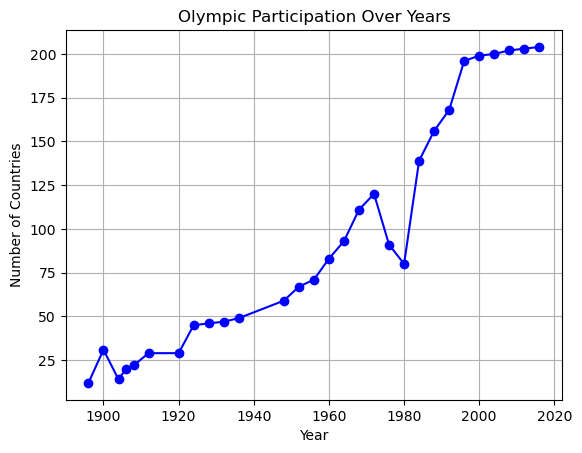

In [271]:
years = [1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924]
counts = [12, 31, 14, 20, 22, 29, 29, 45]

plt.plot(nations_over_time['Year'].to_list(), nations_over_time['count'].to_list(), marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Number of Countries")
plt.title("Olympic Participation Over Years")
plt.grid(True)   # adds grid lines
plt.show()

In [272]:
import plotly.express as px 
fig = px.line(nations_over_time , x='Year',y='count')
fig.show()

In [273]:
df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values(['Year'],ascending=True)

,Year,count
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [274]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [275]:
df.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index().sort_values(['Year'],ascending=True)

,Year,count
28,1896,176
25,1900,1220
27,1904,650
26,1906,841
23,1908,2024
22,1912,2409
21,1920,2675
19,1924,3256
20,1928,3246
24,1932,1922


In [276]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0


In [277]:
x = df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

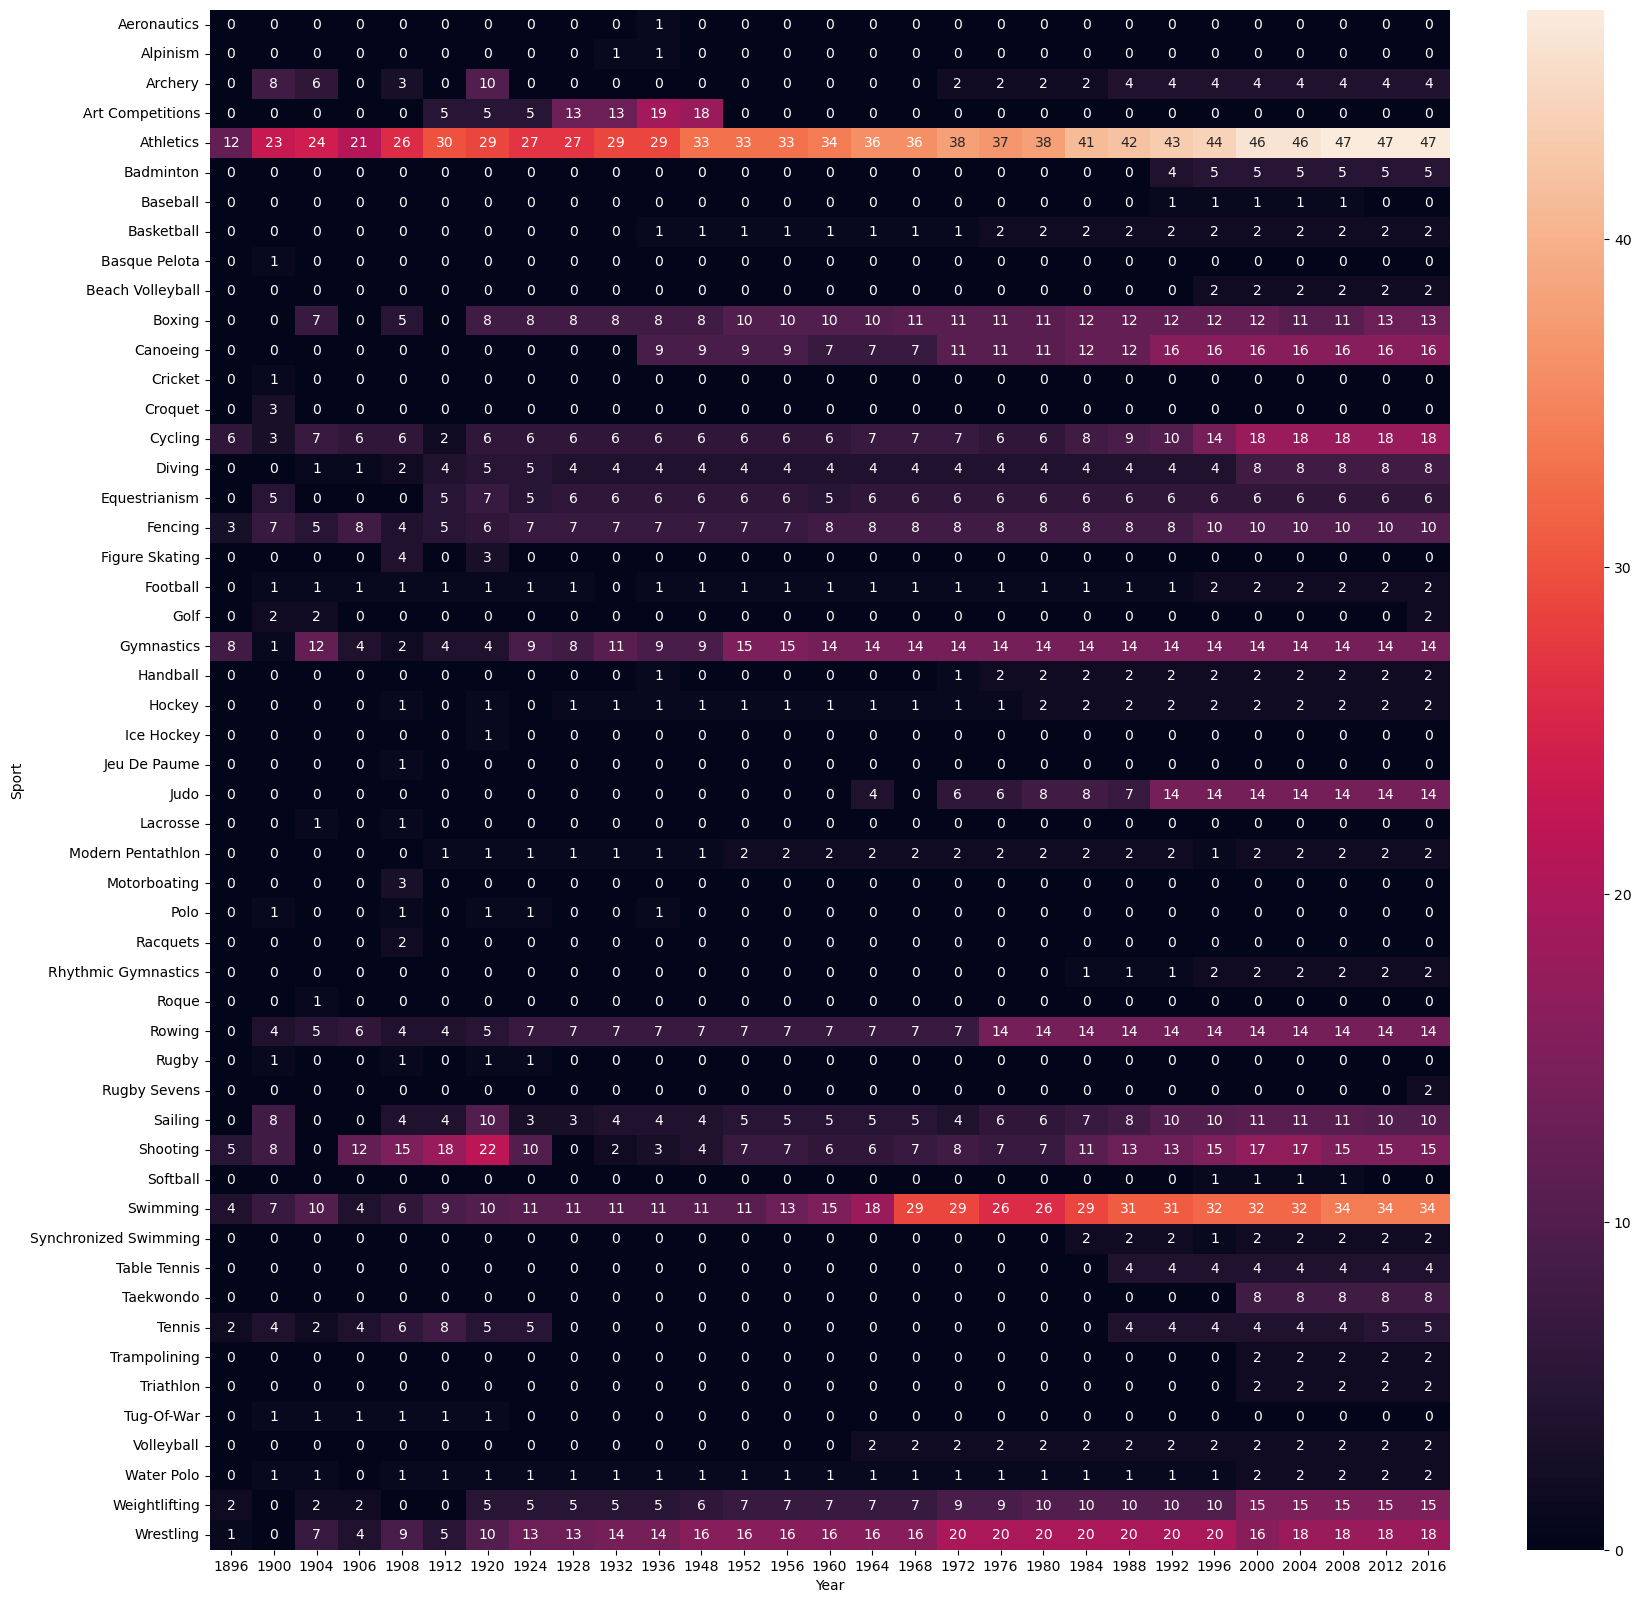

In [278]:
import seaborn as sns 
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport' , columns='Year' , values ='Event',aggfunc='count').fillna(0).astype(int),annot=True)

In [279]:
df.drop_duplicates(['Year','Sport','Event','Name'])

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [280]:
# def most_successfull(df,sport_val):
#     temp_df = df.dropna(subset=['Medal'])

#     if sport_val != 'Overall':
#         temp_df = temp_df[temp_df['Sport'] == sport_val]

#     return temp_df['Name'].value_counts().reset_index().head(15).merge(df , on='Name',how='left')[['Name','count','region','Sport']].drop_duplicates()
#     # return temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name' , right_on='count',how='left')
# most_successfull(df,'Overall')

In [281]:
def most_successfull(df,sport_val):
    temp_df = df.dropna(subset=['Medal'])
    

    if sport_val != 'Overall':
        temp_df = temp_df[temp_df['Sport']==sport_val]
    
    x =  temp_df['Name'].value_counts().reset_index().head(15).merge(df , on="Name",how="left")[['Name','count','region','Sport']].drop_duplicates()

    x.rename(columns={'count':'Medals' , 'region' : 'Region'} , inplace=True)

    return x 

most_successfull(df,'Judo')

,Name,Medals,Region,Sport
0,Ryoko Tamura-Tani,5,Japan,Judo
5,Angelo Parisi,4,UK,Judo
6,Angelo Parisi,4,France,Judo
9,Driulys Gonzlez Morales,4,Cuba,Judo
14,David Douillet,3,France,Judo
17,Rishod Rashidovich Sobirov,3,Uzbekistan,Judo
20,Edith Bosch,3,Netherlands,Judo
24,Amarilys Savn Carmenate,3,Cuba,Judo
28,Teddy Pierre-Marie Riner,3,France,Judo
31,Kye Sun-Hui,3,North Korea,Judo


In [282]:
temp_df = df.dropna(subset=['Medal'])

In [283]:
# country Wise medal tally   -> Removing the duplicates then removing teams duplicates then group by year 
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'] , inplace=True)

In [284]:
temp_df = temp_df[temp_df['region'] == 'USA']
final_df = temp_df.groupby('Year').count()['Medal'].reset_index()

In [285]:
fig = px.line(final_df , x='Year',y='Medal')
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

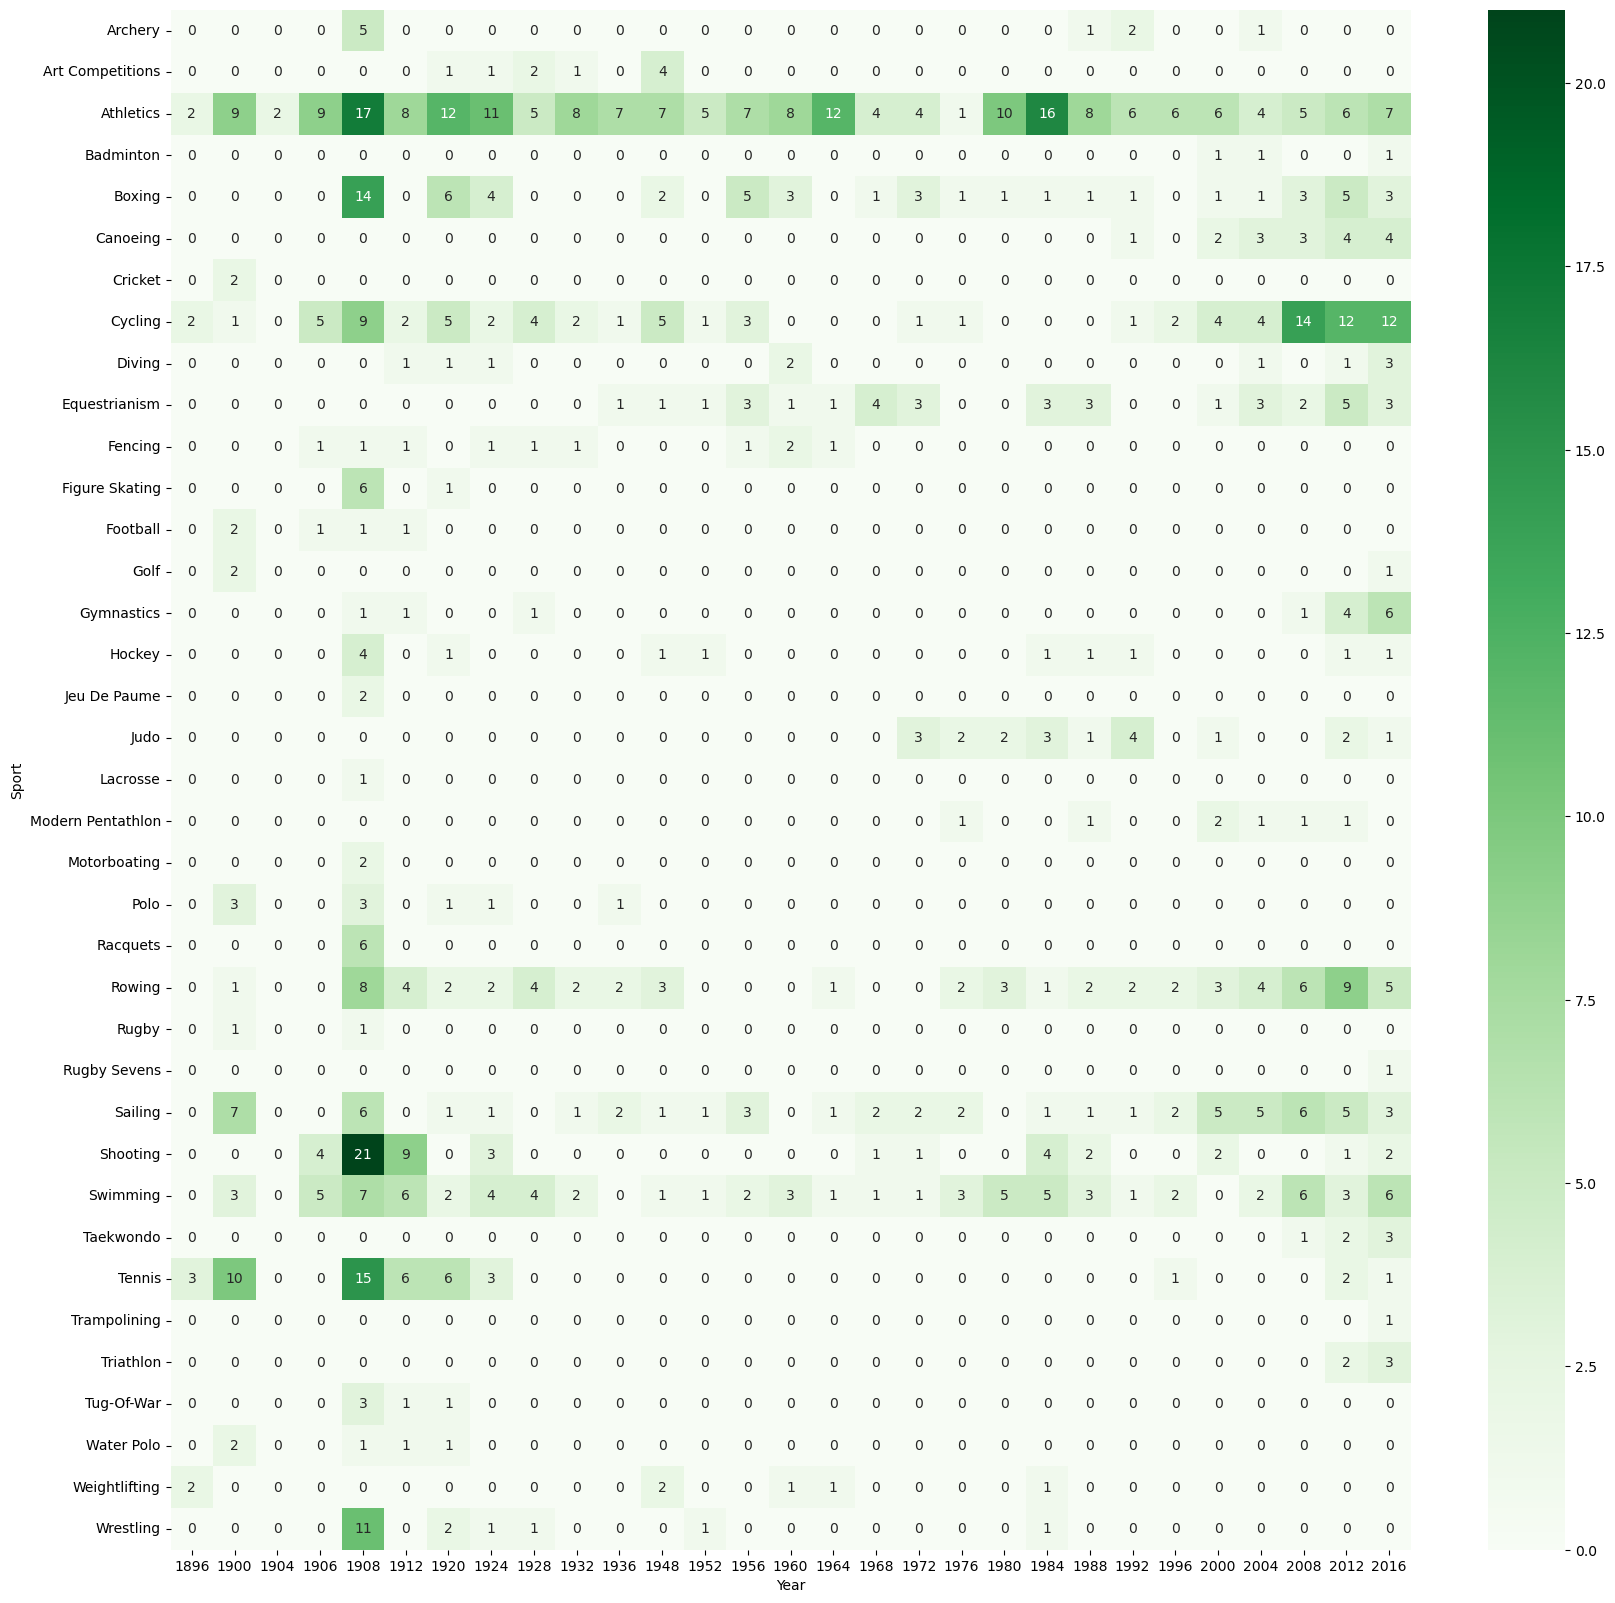

In [286]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'] , inplace=True)
temp_df = temp_df[temp_df['region'] == 'UK']
plt.figure(figsize=(20,20))
sns.heatmap(temp_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0).astype(int),annot=True,cmap='Greens')

In [287]:
def most_successfull(df,country_name):
    temp_df = df.dropna(subset=['Medal'])
    
    temp_df = temp_df[temp_df['region'] == country_name]

    x =  temp_df['Name'].value_counts().reset_index().head(15).merge(df , on="Name",how="left")[['Name','count','region','Sport']].drop_duplicates()

    x.rename(columns={'count':'Medals' , 'region' : 'Region'} , inplace=True)

    return x 

most_successfull(df,'Judo')

,Name,Medals,Region,Sport


In [288]:
temp_df = df.dropna(subset=['Medal'])
temp_df = temp_df[temp_df['region'] == "USA"]
x = temp_df['Name'].value_counts().reset_index().head(15).merge(df , on='Name',how='left')[['Name','count','Sport']].drop_duplicates()
x.rename(columns={'count':'Medals'} , inplace=True)
x = x.reset_index(drop=True)
x.index = x.index + 1
x  

,Name,Medals,Sport
1,"Michael Fred Phelps, II",28,Swimming
2,Ryan Steven Lochte,12,Swimming
3,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming
4,Natalie Anne Coughlin (-Hall),12,Swimming
5,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming
6,"Matthew Nicholas ""Matt"" Biondi",11,Swimming
7,Carl Townsend Osburn,11,Shooting
8,Mark Andrew Spitz,11,Swimming
9,"Raymond Clarence ""Ray"" Ewry",10,Athletics
10,"Frederick Carlton ""Carl"" Lewis",10,Athletics


In [289]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [290]:
temp_df = df.dropna(subset=['Medal'])
temp_df = temp_df.drop_duplicates(subset=['Name','Age','Height','Weight','region'])[['Name','Age']]
temp_df['Age'].value_counts()

Age
23.0    2610
24.0    2519
22.0    2427
25.0    2414
26.0    2276
        ... 
11.0       1
10.0       1
73.0       1
71.0       1
65.0       1
Name: count, Length: 61, dtype: int64

In [291]:
import plotly.figure_factory as ff

In [292]:
athelete_df = df.drop_duplicates(subset=['Name','region'])

In [293]:
all_ath = athelete_df.Age.dropna()
gold_ath = athelete_df[athelete_df['Medal'] == 'Gold']['Age'].dropna()
silver_ath = athelete_df[athelete_df['Medal'] == 'Silver']['Age'].dropna()
bronze_ath = athelete_df[athelete_df['Medal'] == 'Bronze']['Age'].dropna()

In [294]:
fig = ff.create_distplot([all_ath , gold_ath,silver_ath,bronze_ath],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

In [295]:
athelete_df[athelete_df['Medal'] == 'Gold']['Age'].dropna()

3         34.0
33        27.0
60        25.0
111       23.0
116       22.0
          ... 
222253    22.0
222334    22.0
222429    19.0
222463    23.0
222526    21.0
Name: Age, Length: 5570, dtype: float64

In [296]:
x = []
name = []
famous_sport = ['Basketball','Judo','Football','Tug-Of-War','Athletics','Swimming','Badminton','Sailing','Gymnastics','Art Competitions','Handball','Weightlifting','Wrestling','Water Polo','Hockey','Rowing','Fencing','Equestrianism','Shooting','Boxing','Taekwondo','Cycling','Diving','Canoeing','Tennis','Modern Pentathlon','Golf','Softball','Archery','Volleyball','Synchronized Swimming','Table Tennis','Baseball','Rhythmic Gymnastics','Rugby Sevens','Trampolining','Beach Volleyball','Triathlon','Rugby','Lacrosse','Polo','Cricket','Ice Hockey','Racquets','Motorboating','Croquet','Figure Skating','Jeu De Paume','Roque','Basque Pelota','Alpinism','Aeronautics']

for sport in famous_sport:
    temp_df = athelete_df[athelete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)

fig = ff.create_distplot(x,name,show_hist=False,show_rug=False)
# fig.update_layout(autosize=False,width=1000,height=600)
# fig.show()

ValueError: min() iterable argument is empty